<a href="https://colab.research.google.com/github/Monmon891Awesome/swot/blob/master/BatchF_Final_Training_Yolo11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
pip install -U ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 899.0/899.0 kB 53.1 MB/s eta 0:00:00


In [3]:
# Install PyTorch with GPU (CUDA) support
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

Looking in indexes: https://download.pytorch.org/whl/cu118


In [4]:
import torch
print(f"CUDA Available: {torch.cuda.is_available()}")
print(f"CUDA Device Count: {torch.cuda.device_count()}")

CUDA Available: True
CUDA Device Count: 1


In [5]:
import zipfile

zip_path = '/content/drive/My Drive/THESIS FILES/FNT/UNI.zip'
extract_path = '/content/dataset'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Verify extraction
import os
print(f"Extracted files: {os.listdir(extract_path)}")

Extracted files: ['UNI', '__MACOSX']


In [6]:
import os

unified_ds_path = '/content/dataset/UNI'
print(f"Contents of 'Uni': {os.listdir(unified_ds_path)}")

Contents of 'Uni': ['train', 'data.yaml', '.DS_Store', 'valid', 'test']


In [7]:
with open('/content/dataset/UNI/data.yaml', 'r') as yaml_file:
    print(yaml_file.read())

train: ../train/images
val: ../valid/images
test: ../test/images

nc: 3
names: ['crack', 'pothole','Broken Pole']



In [8]:
!nvidia-smi

Mon Dec 16 16:37:46 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA A100-SXM4-40GB          Off | 00000000:00:04.0 Off |                    0 |
| N/A   30C    P0              44W / 400W |      5MiB / 40960MiB |      0%      Default |
|                                         |                      |             Disabled |
+-----------------------------------------+----------------------+--

In [9]:
from ultralytics import YOLO
print("Ultralytics YOLOv11 installed successfully!")

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics YOLOv11 installed successfully!


In [10]:
import os
print(os.cpu_count())

12


In [11]:
from ultralytics import YOLO

# Load YOLO model
model = YOLO('yolo11n.pt')

# Train the YOLO model with custom learning rate
model.train(
    data='/content/dataset/UNI/data.yaml',  # Path to dataset YAML
    epochs=300,                             # Number of training epochs
    imgsz=640,                              # Input image size
    patience=100,
    batch=256,                             # Batch size
    device='0',                            # Use GPU 0
    amp=True,                              # Enable automatic mixed precision
    cache=True,                            # Cache dataset for faster loading
    workers=12,                            # Number of CPU workers for data loading

    # Custom learning rate settings
    lr0=0.01,                              # Initial learning rate
    lrf=0.01,                              # Final learning rate (multiplier of lr0)
    momentum=0.937,                        # SGD momentum
    weight_decay=0.0005,                   # Weight decay for regularization
    optimizer='AdamW',                     # Use AdamW optimizer
)

100%|██████████| 5.35M/5.35M [00:00<00:00, 364MB/s]

Ultralytics 8.3.50 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)


engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/content/dataset/UNI/data.yaml, epochs=300, time=None, patience=100, batch=256, imgsz=640, save=True, save_period=-1, cache=True, device=0, workers=12, project=None, name=train, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=None, format=torchscript, keras=False, optimize=False, int8=

100%|██████████| 755k/755k [00:00<00:00, 40.3MB/s]


Overriding model.yaml nc=80 with nc=3

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /content/dataset/UNI/train/labels... 9105 images, 289 backgrounds, 0 corrupt: 100%|██████████| 9105/9105 [00:08<00:00, 1110.89it/s]


train: New cache created: /content/dataset/UNI/train/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 2503, len(boxes) = 17853. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


train: Caching images (9.6GB RAM): 100%|██████████| 9105/9105 [00:03<00:00, 2475.20it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 1.4.22 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/dataset/UNI/valid/labels... 870 images, 28 backgrounds, 0 corrupt: 100%|██████████| 870/870 [00:00<00:00, 972.25it/s] 


val: New cache created: /content/dataset/UNI/valid/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 396, len(boxes) = 1689. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


val: Caching images (0.9GB RAM): 100%|██████████| 870/870 [00:01<00:00, 502.06it/s]


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: AdamW(lr=0.01, momentum=0.937) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.002), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 12 dataloader workers
Logging results to runs/detect/train
Starting training for 300 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/300      37.7G      1.974        2.9      2.011        682        640: 100%|██████████| 36/36 [00:27<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:05<00:00,  2.93s/it]

                   all        870       1689   0.000746      0.105   0.000393    0.00013



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/300      37.8G      1.801      2.091      1.889        673        640: 100%|██████████| 36/36 [00:25<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.09s/it]


                   all        870       1689    0.00706      0.129    0.00498    0.00141

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/300      37.8G      1.766       2.03      1.847        608        640: 100%|██████████| 36/36 [00:25<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:05<00:00,  2.78s/it]

                   all        870       1689     0.0201     0.0737    0.00581    0.00152



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/300      37.7G      1.735      1.939      1.814        573        640: 100%|██████████| 36/36 [00:25<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:05<00:00,  2.59s/it]

                   all        870       1689     0.0108     0.0376    0.00604    0.00209



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/300      37.5G      1.672      1.824      1.771        672        640: 100%|██████████| 36/36 [00:25<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.45s/it]


                   all        870       1689     0.0186      0.226    0.00909    0.00242

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/300      36.3G      1.611       1.71      1.712        549        640: 100%|██████████| 36/36 [00:25<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.89s/it]

                   all        870       1689      0.375     0.0568      0.018    0.00547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/300      37.6G      1.582      1.669      1.685        562        640: 100%|██████████| 36/36 [00:25<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.13s/it]

                   all        870       1689      0.437      0.113     0.0602      0.023



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/300      37.4G      1.533      1.597      1.649        572        640: 100%|██████████| 36/36 [00:25<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.87s/it]

                   all        870       1689      0.196       0.23       0.11     0.0314



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/300      37.7G      1.531      1.551      1.643        587        640: 100%|██████████| 36/36 [00:25<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.76s/it]

                   all        870       1689      0.173      0.195     0.0986     0.0314



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/300      37.7G      1.473       1.48      1.603        538        640: 100%|██████████| 36/36 [00:25<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.86s/it]

                   all        870       1689      0.352      0.242      0.217      0.077



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/300      37.6G      1.458      1.434      1.582        655        640: 100%|██████████| 36/36 [00:25<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.98s/it]

                   all        870       1689      0.343      0.397      0.289       0.12



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/300      37.4G      1.425      1.384      1.561        672        640: 100%|██████████| 36/36 [00:25<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.75s/it]

                   all        870       1689      0.408      0.267      0.248     0.0866



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/300      37.7G      1.412      1.376      1.556        609        640: 100%|██████████| 36/36 [00:25<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.82s/it]

                   all        870       1689      0.397      0.469      0.379       0.14



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/300      37.5G      1.403      1.351      1.541        629        640: 100%|██████████| 36/36 [00:25<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.79s/it]

                   all        870       1689      0.337       0.37      0.273      0.105



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/300      37.5G      1.373      1.309      1.519        577        640: 100%|██████████| 36/36 [00:25<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.75s/it]

                   all        870       1689      0.422      0.403      0.357       0.13



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/300      36.6G      1.357        1.3      1.509        662        640: 100%|██████████| 36/36 [00:25<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.80s/it]

                   all        870       1689      0.417      0.249      0.207     0.0773



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/300      37.6G      1.345      1.276      1.503        659        640: 100%|██████████| 36/36 [00:25<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.72s/it]

                   all        870       1689      0.434      0.494       0.44      0.176



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/300      37.7G      1.359      1.276      1.508        586        640: 100%|██████████| 36/36 [00:25<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.79s/it]

                   all        870       1689      0.363      0.378      0.299      0.109



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/300      37.5G      1.334      1.238       1.49        623        640: 100%|██████████| 36/36 [00:25<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.91s/it]

                   all        870       1689      0.584      0.374      0.414      0.165



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/300      37.6G      1.298      1.193      1.457        614        640: 100%|██████████| 36/36 [00:25<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.70s/it]

                   all        870       1689      0.569      0.249      0.295     0.0967



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/300      37.5G      1.295      1.177      1.455        578        640: 100%|██████████| 36/36 [00:25<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.72s/it]

                   all        870       1689      0.504      0.343      0.302      0.117



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/300      37.7G      1.277       1.16      1.445        569        640: 100%|██████████| 36/36 [00:25<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.84s/it]

                   all        870       1689       0.43      0.459      0.398       0.17



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/300      37.6G       1.28      1.164      1.444        597        640: 100%|██████████| 36/36 [00:25<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.73s/it]

                   all        870       1689      0.384      0.373      0.302      0.113



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/300      37.8G      1.228      1.106      1.413        591        640: 100%|██████████| 36/36 [00:25<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.81s/it]

                   all        870       1689      0.495      0.515       0.46      0.193



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/300      36.4G      1.218       1.08        1.4        621        640: 100%|██████████| 36/36 [00:25<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.80s/it]

                   all        870       1689      0.477      0.353      0.331      0.139



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/300      37.5G       1.18      1.055      1.375        647        640: 100%|██████████| 36/36 [00:25<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.78s/it]

                   all        870       1689      0.468      0.533      0.457      0.205



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/300      37.8G      1.207      1.073      1.393        627        640: 100%|██████████| 36/36 [00:25<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.89s/it]

                   all        870       1689      0.517       0.52      0.479       0.18



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/300      37.7G      1.178       1.03      1.373        609        640: 100%|██████████| 36/36 [00:25<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.70s/it]

                   all        870       1689      0.538      0.555      0.511      0.217



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/300      37.4G      1.178      1.039      1.371        608        640: 100%|██████████| 36/36 [00:25<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.68s/it]

                   all        870       1689      0.467       0.51      0.456      0.195



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/300      36.4G      1.174      1.026      1.362        544        640: 100%|██████████| 36/36 [00:25<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.95s/it]

                   all        870       1689       0.55       0.52      0.513      0.239



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/300      36.4G      1.134     0.9899      1.341        586        640: 100%|██████████| 36/36 [00:25<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.79s/it]

                   all        870       1689      0.426      0.364      0.304      0.126



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/300      37.6G      1.139     0.9866      1.339        639        640: 100%|██████████| 36/36 [00:25<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.97s/it]

                   all        870       1689      0.551      0.508      0.502      0.221



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/300      37.6G      1.121     0.9579      1.324        667        640: 100%|██████████| 36/36 [00:25<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.82s/it]

                   all        870       1689      0.524      0.449      0.456      0.194



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/300      37.7G      1.137      0.983      1.334        525        640: 100%|██████████| 36/36 [00:25<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.72s/it]

                   all        870       1689      0.546      0.555      0.518      0.221



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/300      36.6G      1.116     0.9569      1.319        590        640: 100%|██████████| 36/36 [00:25<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.82s/it]

                   all        870       1689      0.635      0.575      0.571      0.256



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/300      37.6G      1.107     0.9427      1.316        560        640: 100%|██████████| 36/36 [00:25<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.73s/it]

                   all        870       1689      0.489      0.396      0.361      0.148



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/300      37.6G      1.088     0.9249      1.299        595        640: 100%|██████████| 36/36 [00:25<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.80s/it]

                   all        870       1689      0.568      0.392      0.384      0.158



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/300      37.8G      1.098     0.9244      1.302        558        640: 100%|██████████| 36/36 [00:25<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.84s/it]

                   all        870       1689      0.627      0.536      0.562      0.274



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/300      36.2G      1.084     0.9154      1.294        596        640: 100%|██████████| 36/36 [00:25<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.77s/it]

                   all        870       1689      0.469      0.484      0.448      0.187



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/300      37.7G      1.092     0.9232      1.298        643        640: 100%|██████████| 36/36 [00:25<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.84s/it]

                   all        870       1689       0.59      0.486      0.501      0.219



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/300      37.6G      1.102     0.9259      1.309        562        640: 100%|██████████| 36/36 [00:25<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.79s/it]

                   all        870       1689      0.653      0.502      0.547      0.246



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/300      37.9G      1.017     0.8497      1.251        661        640: 100%|██████████| 36/36 [00:25<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.81s/it]

                   all        870       1689      0.661      0.529      0.565      0.267



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/300      37.8G      1.032     0.8536      1.257        638        640: 100%|██████████| 36/36 [00:25<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.95s/it]

                   all        870       1689      0.632      0.548      0.568      0.264



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/300      37.9G      1.043     0.8707      1.269        685        640: 100%|██████████| 36/36 [00:25<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.68s/it]

                   all        870       1689      0.597      0.544      0.539      0.233



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/300      37.6G       1.03     0.8648       1.26        654        640: 100%|██████████| 36/36 [00:25<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.69s/it]

                   all        870       1689      0.623      0.564      0.569      0.244



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/300      37.6G       1.04     0.8683      1.262        605        640: 100%|██████████| 36/36 [00:25<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.91s/it]

                   all        870       1689      0.525      0.532      0.502      0.214



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/300      36.4G      1.018     0.8428      1.248        681        640: 100%|██████████| 36/36 [00:25<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.85s/it]

                   all        870       1689      0.641      0.616      0.616      0.281



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/300      37.4G      1.007     0.8376      1.241        593        640: 100%|██████████| 36/36 [00:25<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.88s/it]

                   all        870       1689      0.569      0.495      0.476      0.216



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/300      37.7G      1.019     0.8445      1.247        671        640: 100%|██████████| 36/36 [00:25<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.81s/it]

                   all        870       1689      0.611      0.401      0.381      0.163



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/300      37.6G      1.006     0.8293      1.238        581        640: 100%|██████████| 36/36 [00:25<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.76s/it]

                   all        870       1689      0.645      0.522       0.57      0.262



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/300      37.6G     0.9986     0.8199      1.233        717        640: 100%|██████████| 36/36 [00:25<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.80s/it]

                   all        870       1689      0.554      0.453      0.449      0.196



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/300      37.6G          1     0.8267      1.237        606        640: 100%|██████████| 36/36 [00:25<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.76s/it]

                   all        870       1689      0.641      0.569       0.59      0.272



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/300      37.6G      1.009     0.8154      1.236        590        640: 100%|██████████| 36/36 [00:25<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.81s/it]

                   all        870       1689      0.607      0.595      0.585       0.26



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/300      37.7G     0.9784     0.7921      1.226        671        640: 100%|██████████| 36/36 [00:25<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.79s/it]

                   all        870       1689       0.66      0.591      0.615      0.299



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/300      37.6G     0.9805     0.7978      1.219        636        640: 100%|██████████| 36/36 [00:25<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.82s/it]

                   all        870       1689      0.654      0.528      0.573      0.259



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/300      37.7G     0.9715     0.7926      1.215        649        640: 100%|██████████| 36/36 [00:25<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.90s/it]

                   all        870       1689      0.645       0.57      0.597      0.286



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/300      37.6G     0.9431     0.7703      1.199        642        640: 100%|██████████| 36/36 [00:25<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.85s/it]

                   all        870       1689      0.643      0.537       0.57       0.27



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/300      36.3G     0.9513     0.7759      1.207        666        640: 100%|██████████| 36/36 [00:25<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.80s/it]

                   all        870       1689      0.656      0.573      0.592       0.28



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/300      37.6G     0.9384     0.7613      1.196        626        640: 100%|██████████| 36/36 [00:25<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.94s/it]

                   all        870       1689      0.659      0.608      0.625      0.308



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/300      37.6G     0.9391     0.7609      1.196        627        640: 100%|██████████| 36/36 [00:25<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.76s/it]

                   all        870       1689       0.57      0.447      0.477      0.225



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/300      36.5G     0.9419     0.7627      1.197        628        640: 100%|██████████| 36/36 [00:25<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.78s/it]

                   all        870       1689      0.547      0.427      0.416      0.172



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/300      37.8G     0.9378      0.763      1.195        609        640: 100%|██████████| 36/36 [00:25<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.89s/it]

                   all        870       1689      0.656      0.554      0.593      0.287



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/300      37.4G     0.9212     0.7438      1.181        603        640: 100%|██████████| 36/36 [00:25<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.82s/it]

                   all        870       1689      0.693      0.574      0.617       0.29



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/300      37.7G     0.9298     0.7455      1.186        661        640: 100%|██████████| 36/36 [00:26<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.91s/it]

                   all        870       1689      0.707      0.618      0.652      0.323



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/300      37.7G     0.9102     0.7311      1.174        522        640: 100%|██████████| 36/36 [00:25<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.86s/it]

                   all        870       1689      0.635      0.569      0.578      0.278



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/300      37.5G     0.9143     0.7448      1.177        623        640: 100%|██████████| 36/36 [00:25<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.75s/it]

                   all        870       1689      0.718      0.575      0.629      0.296



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/300      37.4G     0.8823     0.7138      1.159        632        640: 100%|██████████| 36/36 [00:25<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.91s/it]

                   all        870       1689      0.695      0.584      0.643      0.309



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/300      36.5G     0.9127     0.7355      1.177        577        640: 100%|██████████| 36/36 [00:25<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.73s/it]

                   all        870       1689      0.664      0.571      0.612      0.302



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/300      37.7G     0.9023     0.7259      1.171        681        640: 100%|██████████| 36/36 [00:25<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.88s/it]

                   all        870       1689      0.664      0.582      0.605      0.287



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/300      37.8G     0.9159     0.7236      1.176        614        640: 100%|██████████| 36/36 [00:25<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.88s/it]

                   all        870       1689      0.668      0.593      0.623      0.321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/300      37.1G     0.8919     0.7112      1.164        608        640: 100%|██████████| 36/36 [00:25<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.68s/it]

                   all        870       1689      0.693      0.556      0.613      0.298



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/300      36.5G      0.892     0.7122      1.168        558        640: 100%|██████████| 36/36 [00:25<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.78s/it]

                   all        870       1689      0.681      0.601      0.627      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/300      37.6G     0.8846     0.7073      1.159        583        640: 100%|██████████| 36/36 [00:25<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.76s/it]

                   all        870       1689      0.655      0.562      0.585      0.296



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/300      37.6G     0.8654     0.6922      1.147        568        640: 100%|██████████| 36/36 [00:25<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.76s/it]

                   all        870       1689      0.664      0.614      0.636       0.33



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/300      37.5G     0.8597     0.6924      1.146        666        640: 100%|██████████| 36/36 [00:25<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.84s/it]

                   all        870       1689      0.698      0.634      0.659      0.335



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/300      36.4G     0.8689      0.696      1.149        633        640: 100%|██████████| 36/36 [00:25<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.73s/it]

                   all        870       1689      0.679      0.572      0.611      0.311



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/300      37.8G      0.866     0.6877      1.145        617        640: 100%|██████████| 36/36 [00:25<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.76s/it]

                   all        870       1689      0.711      0.613      0.652      0.346



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/300      37.6G     0.8505     0.6765      1.136        661        640: 100%|██████████| 36/36 [00:25<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.88s/it]

                   all        870       1689      0.703      0.593       0.64      0.324



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/300      36.5G     0.8524     0.6748      1.135        587        640: 100%|██████████| 36/36 [00:25<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.85s/it]

                   all        870       1689      0.731      0.616      0.673      0.337



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/300      37.7G     0.8717     0.6933       1.15        563        640: 100%|██████████| 36/36 [00:25<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.91s/it]

                   all        870       1689      0.702      0.608      0.634      0.317



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/300      36.3G     0.8668     0.6909      1.146        606        640: 100%|██████████| 36/36 [00:25<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.82s/it]

                   all        870       1689      0.662      0.567      0.607      0.301



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/300      37.8G     0.8519     0.6783      1.136        617        640: 100%|██████████| 36/36 [00:25<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.77s/it]

                   all        870       1689       0.73      0.617      0.655       0.33



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/300      37.8G      0.842     0.6558      1.127        589        640: 100%|██████████| 36/36 [00:25<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.79s/it]

                   all        870       1689      0.712       0.61      0.665      0.327



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/300      37.7G     0.8436     0.6649      1.131        596        640: 100%|██████████| 36/36 [00:25<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.83s/it]

                   all        870       1689      0.688      0.615       0.64      0.327



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/300      37.8G     0.8486     0.6658      1.135        606        640: 100%|██████████| 36/36 [00:25<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.75s/it]

                   all        870       1689      0.672      0.564      0.588      0.275



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/300      36.3G     0.8444      0.666      1.128        600        640: 100%|██████████| 36/36 [00:25<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.82s/it]

                   all        870       1689      0.714      0.581      0.653      0.326



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/300      37.9G     0.8408     0.6602      1.125        602        640: 100%|██████████| 36/36 [00:25<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.75s/it]

                   all        870       1689      0.709      0.605      0.647      0.325



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/300      37.8G     0.8376     0.6592      1.128        660        640: 100%|██████████| 36/36 [00:25<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.86s/it]

                   all        870       1689      0.744      0.625      0.671      0.345



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/300      37.8G     0.8421     0.6575      1.131        584        640: 100%|██████████| 36/36 [00:25<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.84s/it]

                   all        870       1689      0.682      0.618      0.645      0.332



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/300      37.8G     0.8113     0.6445      1.114        572        640: 100%|██████████| 36/36 [00:25<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.80s/it]

                   all        870       1689      0.703      0.596      0.635      0.312



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/300      37.8G     0.8145      0.646      1.117        640        640: 100%|██████████| 36/36 [00:25<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.84s/it]

                   all        870       1689      0.694      0.623      0.663      0.351



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/300      37.8G     0.8334     0.6611      1.122        549        640: 100%|██████████| 36/36 [00:25<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.85s/it]

                   all        870       1689      0.709       0.61      0.649      0.327



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/300      37.6G     0.7978     0.6343      1.106        557        640: 100%|██████████| 36/36 [00:25<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.84s/it]

                   all        870       1689       0.73      0.604      0.672      0.358



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/300      37.9G     0.8242     0.6414      1.115        636        640: 100%|██████████| 36/36 [00:25<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.90s/it]

                   all        870       1689      0.711      0.598      0.653      0.339



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/300      37.8G     0.8193     0.6491      1.116        581        640: 100%|██████████| 36/36 [00:25<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.72s/it]

                   all        870       1689      0.687      0.604       0.63      0.314



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/300      36.5G      0.805     0.6337      1.106        592        640: 100%|██████████| 36/36 [00:25<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.77s/it]

                   all        870       1689      0.712      0.633      0.665      0.353



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/300      37.9G     0.8081     0.6427      1.111        582        640: 100%|██████████| 36/36 [00:25<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.82s/it]

                   all        870       1689      0.681      0.575      0.617      0.316



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/300      37.6G      0.823     0.6443      1.119        602        640: 100%|██████████| 36/36 [00:25<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.75s/it]

                   all        870       1689      0.744       0.61      0.674       0.35



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/300      37.8G     0.8048       0.63      1.105        580        640: 100%|██████████| 36/36 [00:25<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.85s/it]

                   all        870       1689      0.756      0.627      0.676      0.351



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/300      37.1G     0.8017     0.6282      1.103        571        640: 100%|██████████| 36/36 [00:25<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.71s/it]

                   all        870       1689      0.703      0.628      0.666      0.342



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/300      37.7G      0.779     0.6123      1.092        618        640: 100%|██████████| 36/36 [00:25<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.76s/it]

                   all        870       1689      0.744      0.622      0.683      0.364



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/300      37.8G     0.7746     0.6099       1.09        603        640: 100%|██████████| 36/36 [00:25<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.81s/it]

                   all        870       1689      0.722      0.609      0.652      0.341



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/300      37.7G     0.7941     0.6183        1.1        685        640: 100%|██████████| 36/36 [00:25<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.71s/it]

                   all        870       1689      0.738      0.617      0.673      0.358



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/300      37.6G     0.7773      0.607      1.092        604        640: 100%|██████████| 36/36 [00:25<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.74s/it]

                   all        870       1689      0.722      0.641      0.665       0.35



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/300      37.9G     0.7915     0.6226      1.103        602        640: 100%|██████████| 36/36 [00:25<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.75s/it]

                   all        870       1689      0.678      0.651      0.667      0.353



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/300      37.9G     0.7763     0.6113       1.09        563        640: 100%|██████████| 36/36 [00:25<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.78s/it]

                   all        870       1689      0.755      0.612       0.67      0.347



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/300      37.8G     0.7607      0.595      1.081        578        640: 100%|██████████| 36/36 [00:25<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.85s/it]

                   all        870       1689      0.741      0.615      0.671      0.359



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/300      37.8G     0.7826     0.6056       1.09        674        640: 100%|██████████| 36/36 [00:25<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.71s/it]

                   all        870       1689      0.733      0.624       0.68      0.347



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/300      37.6G      0.779     0.6051      1.091        529        640: 100%|██████████| 36/36 [00:25<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.84s/it]

                   all        870       1689      0.767      0.616      0.686      0.356



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/300      36.6G     0.7544     0.5912      1.079        604        640: 100%|██████████| 36/36 [00:25<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.89s/it]

                   all        870       1689      0.751      0.653        0.7       0.37



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/300      37.7G     0.7506      0.586      1.075        598        640: 100%|██████████| 36/36 [00:25<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.72s/it]

                   all        870       1689      0.714      0.629      0.671      0.342



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/300      37.7G     0.7695     0.6006      1.086        620        640: 100%|██████████| 36/36 [00:25<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.95s/it]

                   all        870       1689      0.744      0.602      0.658      0.347



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/300      37.9G     0.7616     0.5956      1.082        549        640: 100%|██████████| 36/36 [00:25<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.72s/it]

                   all        870       1689      0.714       0.67      0.678      0.359



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/300      37.6G       0.75     0.5846      1.076        607        640: 100%|██████████| 36/36 [00:25<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.82s/it]

                   all        870       1689      0.762       0.62       0.68      0.364



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/300      36.5G      0.758     0.5904      1.079        579        640: 100%|██████████| 36/36 [00:25<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.77s/it]

                   all        870       1689      0.746      0.612      0.648      0.342



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/300      37.7G     0.7427     0.5825      1.072        569        640: 100%|██████████| 36/36 [00:25<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.76s/it]

                   all        870       1689      0.757      0.631      0.691      0.385



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/300      37.6G     0.7647     0.5919       1.08        526        640: 100%|██████████| 36/36 [00:25<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.83s/it]

                   all        870       1689      0.721      0.604      0.658      0.354



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/300      37.6G     0.7413     0.5807       1.07        693        640: 100%|██████████| 36/36 [00:25<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.91s/it]

                   all        870       1689      0.754       0.63      0.665      0.343



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/300      37.6G       0.75     0.5822      1.071        564        640: 100%|██████████| 36/36 [00:25<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.82s/it]

                   all        870       1689      0.752        0.6      0.665      0.358



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/300      37.6G     0.7484     0.5829      1.075        662        640: 100%|██████████| 36/36 [00:25<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.89s/it]

                   all        870       1689      0.734      0.605      0.667      0.364



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/300      37.6G      0.757     0.5914      1.078        618        640: 100%|██████████| 36/36 [00:25<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.77s/it]

                   all        870       1689      0.727      0.661      0.686      0.372



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/300      36.6G     0.7517     0.5805      1.072        540        640: 100%|██████████| 36/36 [00:25<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.79s/it]

                   all        870       1689      0.706      0.651      0.684      0.356



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/300      37.5G     0.7435     0.5737      1.065        569        640: 100%|██████████| 36/36 [00:25<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.85s/it]

                   all        870       1689      0.733      0.606      0.668      0.351



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/300      37.6G     0.7371     0.5683      1.065        591        640: 100%|██████████| 36/36 [00:25<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.82s/it]

                   all        870       1689      0.742      0.639      0.677      0.347



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/300      36.3G     0.7463     0.5767       1.07        581        640: 100%|██████████| 36/36 [00:25<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.84s/it]

                   all        870       1689      0.747      0.635       0.68      0.364



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/300      37.8G     0.7314      0.564       1.06        551        640: 100%|██████████| 36/36 [00:25<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.81s/it]

                   all        870       1689      0.744      0.594      0.656      0.344



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/300      37.8G     0.7375     0.5631      1.063        648        640: 100%|██████████| 36/36 [00:25<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.71s/it]

                   all        870       1689      0.757       0.62      0.695      0.378



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/300      37.6G     0.7395     0.5568      1.066        633        640: 100%|██████████| 36/36 [00:25<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.88s/it]

                   all        870       1689      0.738      0.632      0.691      0.378



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/300      37.8G     0.7312     0.5592      1.059        634        640: 100%|██████████| 36/36 [00:25<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.77s/it]

                   all        870       1689      0.754      0.599      0.667      0.366



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/300      37.4G     0.7191     0.5508      1.053        628        640: 100%|██████████| 36/36 [00:25<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.81s/it]

                   all        870       1689      0.738      0.655        0.7      0.384



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/300      36.6G      0.747     0.5705      1.065        585        640: 100%|██████████| 36/36 [00:25<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.82s/it]

                   all        870       1689      0.738      0.632      0.686      0.379



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/300      37.1G     0.7194     0.5557      1.056        595        640: 100%|██████████| 36/36 [00:25<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.74s/it]

                   all        870       1689       0.74      0.617      0.678      0.359



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/300      37.7G      0.716     0.5514      1.056        629        640: 100%|██████████| 36/36 [00:25<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.67s/it]

                   all        870       1689      0.718      0.649      0.687      0.363



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/300      37.6G     0.7251     0.5602      1.059        622        640: 100%|██████████| 36/36 [00:25<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.86s/it]

                   all        870       1689      0.726      0.644      0.682      0.368



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/300      37.5G     0.7065     0.5481      1.053        608        640: 100%|██████████| 36/36 [00:25<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.76s/it]

                   all        870       1689      0.744      0.651      0.692      0.379



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/300      37.6G     0.7146     0.5541      1.056        578        640: 100%|██████████| 36/36 [00:25<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.88s/it]

                   all        870       1689       0.75      0.657      0.698      0.373



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/300      37.9G     0.7202     0.5534      1.055        620        640: 100%|██████████| 36/36 [00:25<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.79s/it]

                   all        870       1689       0.73       0.65      0.699      0.388



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/300      37.7G     0.6956     0.5354      1.042        551        640: 100%|██████████| 36/36 [00:25<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.79s/it]

                   all        870       1689      0.771      0.622      0.689      0.375



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/300      37.8G     0.7085     0.5508      1.049        583        640: 100%|██████████| 36/36 [00:25<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.70s/it]

                   all        870       1689      0.747       0.67      0.699       0.39



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/300      37.5G     0.7037     0.5382      1.045        601        640: 100%|██████████| 36/36 [00:25<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.71s/it]

                   all        870       1689      0.757      0.651      0.693      0.388



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/300      36.4G     0.7231     0.5557      1.056        544        640: 100%|██████████| 36/36 [00:26<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.80s/it]

                   all        870       1689      0.714       0.66      0.686      0.378



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/300      37.8G     0.7036     0.5417      1.049        629        640: 100%|██████████| 36/36 [00:25<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.76s/it]

                   all        870       1689      0.726      0.647      0.685      0.388



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/300      37.8G     0.6949     0.5364      1.045        552        640: 100%|██████████| 36/36 [00:26<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.77s/it]

                   all        870       1689      0.761       0.64        0.7       0.38



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/300      36.2G     0.7087     0.5465      1.046        557        640: 100%|██████████| 36/36 [00:25<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.89s/it]

                   all        870       1689      0.762      0.631      0.693      0.386



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/300      36.4G     0.6874     0.5312      1.037        633        640: 100%|██████████| 36/36 [00:25<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.68s/it]

                   all        870       1689      0.734      0.659      0.703       0.39



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/300      36.3G     0.6893     0.5266      1.039        623        640: 100%|██████████| 36/36 [00:25<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.85s/it]

                   all        870       1689      0.757      0.663      0.707      0.392



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/300      37.7G     0.7277     0.5373      1.047        585        640: 100%|██████████| 36/36 [00:25<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.83s/it]

                   all        870       1689      0.726      0.648      0.693      0.398



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/300      37.6G     0.6782     0.5159      1.035        626        640: 100%|██████████| 36/36 [00:25<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.75s/it]

                   all        870       1689      0.768      0.669       0.71      0.394



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    149/300      37.6G     0.6893     0.5273      1.039        558        640: 100%|██████████| 36/36 [00:25<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.86s/it]

                   all        870       1689      0.729      0.652      0.694      0.383



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    150/300      37.6G     0.6949     0.5324      1.041        617        640: 100%|██████████| 36/36 [00:25<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.70s/it]

                   all        870       1689       0.75      0.634      0.698       0.39



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    151/300      37.8G     0.6871      0.528      1.039        581        640: 100%|██████████| 36/36 [00:25<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.76s/it]

                   all        870       1689      0.762      0.625       0.69      0.385



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    152/300      36.3G     0.6812     0.5213      1.035        577        640: 100%|██████████| 36/36 [00:25<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.92s/it]

                   all        870       1689      0.793      0.642      0.713      0.394



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    153/300      37.6G     0.6744     0.5213      1.031        566        640: 100%|██████████| 36/36 [00:25<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.77s/it]

                   all        870       1689       0.78      0.655      0.713      0.398



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    154/300      37.8G     0.6904     0.5339       1.04        601        640: 100%|██████████| 36/36 [00:25<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.85s/it]

                   all        870       1689       0.77      0.663      0.723      0.397



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    155/300      37.8G     0.6738     0.5204      1.031        596        640: 100%|██████████| 36/36 [00:25<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.81s/it]

                   all        870       1689      0.738      0.666      0.717      0.408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    156/300      37.8G     0.6683     0.5185      1.028        657        640: 100%|██████████| 36/36 [00:25<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.73s/it]

                   all        870       1689      0.782      0.633      0.708      0.397



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    157/300      37.6G     0.6779      0.517      1.029        585        640: 100%|██████████| 36/36 [00:25<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.96s/it]

                   all        870       1689      0.773       0.66      0.719      0.409



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    158/300      37.7G     0.6848     0.5235      1.034        525        640: 100%|██████████| 36/36 [00:25<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.75s/it]

                   all        870       1689      0.761      0.666       0.71      0.403



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    159/300      37.4G     0.6739     0.5173      1.031        589        640: 100%|██████████| 36/36 [00:25<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.70s/it]

                   all        870       1689      0.743       0.66      0.719      0.409



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    160/300      37.7G     0.6794     0.5121       1.03        544        640: 100%|██████████| 36/36 [00:25<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.82s/it]

                   all        870       1689      0.767      0.657      0.719       0.41



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    161/300      37.6G     0.6656     0.5065      1.025        616        640: 100%|██████████| 36/36 [00:25<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.78s/it]

                   all        870       1689      0.759      0.676      0.718      0.417



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    162/300      37.9G     0.6637     0.5136      1.023        633        640: 100%|██████████| 36/36 [00:25<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.77s/it]

                   all        870       1689      0.768      0.642      0.703      0.394



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    163/300      36.6G     0.6582     0.5078      1.027        561        640: 100%|██████████| 36/36 [00:25<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.79s/it]

                   all        870       1689      0.775      0.663      0.715      0.409



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    164/300      37.8G     0.6686     0.5086      1.028        579        640: 100%|██████████| 36/36 [00:25<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.72s/it]

                   all        870       1689      0.761      0.653      0.709      0.406



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    165/300      36.3G     0.6524     0.5048      1.018        675        640: 100%|██████████| 36/36 [00:25<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.91s/it]

                   all        870       1689       0.76      0.654       0.71      0.407



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    166/300      37.6G     0.6599     0.5078      1.022        612        640: 100%|██████████| 36/36 [00:25<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.78s/it]

                   all        870       1689      0.753      0.671      0.718      0.407



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    167/300      37.8G     0.6575     0.5079      1.023        617        640: 100%|██████████| 36/36 [00:25<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.81s/it]

                   all        870       1689      0.782      0.662      0.724      0.417



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    168/300      36.4G     0.6506     0.4991      1.019        622        640: 100%|██████████| 36/36 [00:25<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.84s/it]

                   all        870       1689      0.782      0.666      0.723      0.412



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    169/300      37.8G     0.6564     0.5059      1.026        593        640: 100%|██████████| 36/36 [00:25<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.71s/it]

                   all        870       1689       0.76      0.681      0.716      0.406



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    170/300      37.6G      0.647     0.4955      1.018        595        640: 100%|██████████| 36/36 [00:25<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.85s/it]

                   all        870       1689      0.782      0.632       0.71      0.407



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    171/300      36.6G     0.6639     0.5052      1.024        679        640: 100%|██████████| 36/36 [00:25<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.79s/it]

                   all        870       1689      0.778       0.64      0.711      0.404



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    172/300      36.5G     0.6435     0.4926      1.017        549        640: 100%|██████████| 36/36 [00:25<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.78s/it]

                   all        870       1689      0.744       0.68      0.714      0.409



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    173/300      37.6G     0.6437     0.4935      1.016        610        640: 100%|██████████| 36/36 [00:25<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.89s/it]

                   all        870       1689      0.747      0.681      0.721      0.411



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    174/300      37.1G      0.643     0.4924      1.018        608        640: 100%|██████████| 36/36 [00:25<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.71s/it]

                   all        870       1689      0.788      0.644      0.719      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    175/300      37.7G     0.6421     0.4917      1.015        544        640: 100%|██████████| 36/36 [00:25<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.71s/it]

                   all        870       1689      0.783      0.666      0.727      0.421



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    176/300      37.1G     0.6431     0.4903      1.014        566        640: 100%|██████████| 36/36 [00:25<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.78s/it]

                   all        870       1689      0.804      0.662       0.73      0.417



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    177/300      37.6G     0.6595     0.4887      1.017        592        640: 100%|██████████| 36/36 [00:25<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.74s/it]

                   all        870       1689      0.783      0.661      0.719      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    178/300      37.6G     0.6239     0.4761      1.006        613        640: 100%|██████████| 36/36 [00:25<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.88s/it]

                   all        870       1689      0.772      0.657      0.716      0.414



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    179/300      37.5G     0.6293     0.4847      1.008        625        640: 100%|██████████| 36/36 [00:25<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.82s/it]

                   all        870       1689       0.78      0.658      0.716      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    180/300      37.4G     0.6344     0.4813      1.009        566        640: 100%|██████████| 36/36 [00:26<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.88s/it]

                   all        870       1689      0.778      0.666       0.73       0.42



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    181/300      37.9G     0.6409     0.4877      1.013        534        640: 100%|██████████| 36/36 [00:25<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.86s/it]

                   all        870       1689      0.762      0.671       0.73       0.42



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    182/300      37.6G     0.6348     0.4851      1.008        598        640: 100%|██████████| 36/36 [00:25<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.73s/it]

                   all        870       1689      0.747      0.667      0.717      0.408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    183/300      37.6G     0.6409     0.4853      1.011        556        640: 100%|██████████| 36/36 [00:25<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.91s/it]

                   all        870       1689      0.778      0.645      0.718      0.414



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    184/300      37.6G     0.6337     0.4801      1.008        619        640: 100%|██████████| 36/36 [00:25<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.85s/it]

                   all        870       1689      0.767      0.663      0.724       0.42



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    185/300      36.3G     0.6552     0.4859      1.016        531        640: 100%|██████████| 36/36 [00:25<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.72s/it]

                   all        870       1689      0.767      0.656      0.724      0.418



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    186/300      37.9G     0.6056     0.4709     0.9992        587        640: 100%|██████████| 36/36 [00:25<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.78s/it]

                   all        870       1689      0.764      0.666      0.723      0.419



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    187/300      37.8G      0.623     0.4735      1.004        539        640: 100%|██████████| 36/36 [00:25<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.86s/it]

                   all        870       1689      0.766      0.658      0.724       0.41



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    188/300      37.8G     0.6242     0.4756      1.005        643        640: 100%|██████████| 36/36 [00:25<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.72s/it]

                   all        870       1689      0.764      0.673      0.727      0.416



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    189/300      36.3G     0.6094     0.4675      1.001        582        640: 100%|██████████| 36/36 [00:26<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.97s/it]

                   all        870       1689      0.777      0.672      0.731      0.426



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    190/300      37.5G     0.6177     0.4728      1.002        596        640: 100%|██████████| 36/36 [00:25<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.75s/it]

                   all        870       1689      0.751      0.662      0.724      0.427



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    191/300      37.6G     0.6144     0.4702      1.001        629        640: 100%|██████████| 36/36 [00:25<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.76s/it]

                   all        870       1689      0.766      0.674      0.728      0.427



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    192/300      37.9G     0.6252     0.4747      1.003        629        640: 100%|██████████| 36/36 [00:25<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.81s/it]

                   all        870       1689      0.811      0.647      0.726      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    193/300      37.7G     0.6335     0.4764      1.005        604        640: 100%|██████████| 36/36 [00:25<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.76s/it]

                   all        870       1689      0.763      0.659      0.722      0.414



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    194/300      36.3G     0.6048     0.4664     0.9997        609        640: 100%|██████████| 36/36 [00:25<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.81s/it]

                   all        870       1689      0.761       0.67      0.729      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    195/300      37.8G     0.6207     0.4733      1.002        587        640: 100%|██████████| 36/36 [00:25<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.86s/it]

                   all        870       1689      0.763       0.68      0.734       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    196/300      36.6G      0.614     0.4642     0.9994        637        640: 100%|██████████| 36/36 [00:25<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.72s/it]

                   all        870       1689      0.749      0.689      0.724      0.425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    197/300      37.7G     0.6119     0.4622     0.9988        545        640: 100%|██████████| 36/36 [00:25<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.87s/it]

                   all        870       1689      0.785      0.675      0.733      0.428



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    198/300      37.5G     0.6272     0.4692      1.001        631        640: 100%|██████████| 36/36 [00:26<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.79s/it]

                   all        870       1689      0.756      0.676      0.721      0.424



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    199/300      37.8G     0.6101     0.4613     0.9965        534        640: 100%|██████████| 36/36 [00:25<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.72s/it]

                   all        870       1689      0.768      0.671      0.728      0.426



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    200/300      37.7G     0.6022     0.4612     0.9951        560        640: 100%|██████████| 36/36 [00:25<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.74s/it]

                   all        870       1689      0.749      0.697      0.732      0.426



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    201/300      37.7G     0.6068     0.4642     0.9975        573        640: 100%|██████████| 36/36 [00:25<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.69s/it]

                   all        870       1689      0.775      0.657      0.725      0.419



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    202/300      36.3G     0.6042     0.4586     0.9926        628        640: 100%|██████████| 36/36 [00:25<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.82s/it]

                   all        870       1689      0.772      0.677      0.735      0.432



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    203/300      37.7G     0.6149     0.4662     0.9987        628        640: 100%|██████████| 36/36 [00:25<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.66s/it]

                   all        870       1689      0.762      0.645      0.716      0.421



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    204/300      37.6G     0.6058     0.4572     0.9961        621        640: 100%|██████████| 36/36 [00:26<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.78s/it]

                   all        870       1689      0.773      0.666      0.728      0.429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    205/300      37.5G     0.5995     0.4608      0.995        555        640: 100%|██████████| 36/36 [00:25<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.83s/it]

                   all        870       1689      0.771      0.676      0.727      0.429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    206/300      36.3G     0.5954     0.4535     0.9896        583        640: 100%|██████████| 36/36 [00:25<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.79s/it]

                   all        870       1689      0.782      0.671      0.737      0.433



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    207/300      37.4G     0.6035      0.453      0.993        643        640: 100%|██████████| 36/36 [00:26<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.99s/it]

                   all        870       1689      0.804      0.663      0.735      0.438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    208/300      36.5G     0.6004     0.4563     0.9941        643        640: 100%|██████████| 36/36 [00:25<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.70s/it]

                   all        870       1689      0.777      0.681      0.736      0.436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    209/300      37.5G     0.5932     0.4542     0.9917        585        640: 100%|██████████| 36/36 [00:25<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.76s/it]

                   all        870       1689      0.799      0.654      0.732      0.433



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    210/300      37.6G     0.5993     0.4546       0.99        623        640: 100%|██████████| 36/36 [00:25<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.86s/it]

                   all        870       1689      0.798       0.67      0.734      0.436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    211/300      37.6G     0.5908       0.45     0.9896        561        640: 100%|██████████| 36/36 [00:25<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.72s/it]

                   all        870       1689      0.765      0.686      0.734       0.44



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    212/300      36.3G     0.5852     0.4469     0.9888        630        640: 100%|██████████| 36/36 [00:25<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.77s/it]

                   all        870       1689      0.764      0.678      0.735      0.438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    213/300      37.9G     0.5952     0.4512     0.9908        656        640: 100%|██████████| 36/36 [00:25<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.80s/it]

                   all        870       1689      0.766      0.673       0.73      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    214/300      37.8G     0.5939     0.4485     0.9912        609        640: 100%|██████████| 36/36 [00:25<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.71s/it]

                   all        870       1689      0.777      0.672      0.733      0.433



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    215/300      37.6G     0.5901      0.452     0.9903        537        640: 100%|██████████| 36/36 [00:25<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.86s/it]

                   all        870       1689      0.773      0.677      0.737      0.432



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    216/300      37.8G      0.589     0.4475     0.9877        673        640: 100%|██████████| 36/36 [00:26<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.74s/it]

                   all        870       1689      0.788       0.67      0.737      0.438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    217/300      37.4G     0.5868     0.4488     0.9873        618        640: 100%|██████████| 36/36 [00:25<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.71s/it]

                   all        870       1689      0.794      0.677      0.742      0.441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    218/300      37.6G     0.5826     0.4438     0.9844        620        640: 100%|██████████| 36/36 [00:25<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.69s/it]

                   all        870       1689      0.776      0.681      0.733      0.442



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    219/300      37.7G      0.583     0.4419     0.9861        683        640: 100%|██████████| 36/36 [00:25<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.67s/it]

                   all        870       1689      0.772      0.688      0.736      0.439



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    220/300      37.8G     0.5875     0.4437     0.9859        578        640: 100%|██████████| 36/36 [00:25<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.89s/it]

                   all        870       1689      0.762      0.691      0.737       0.44



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    221/300      37.7G     0.5742     0.4376     0.9822        624        640: 100%|██████████| 36/36 [00:25<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.74s/it]

                   all        870       1689       0.77      0.683       0.74      0.445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    222/300      37.8G     0.5776     0.4431     0.9868        471        640: 100%|██████████| 36/36 [00:25<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.70s/it]

                   all        870       1689      0.778      0.688      0.741      0.445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    223/300      37.8G      0.581     0.4396     0.9833        560        640: 100%|██████████| 36/36 [00:25<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.86s/it]

                   all        870       1689      0.789      0.685      0.741      0.442



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    224/300      36.2G     0.5749     0.4381     0.9819        655        640: 100%|██████████| 36/36 [00:25<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.73s/it]

                   all        870       1689      0.795      0.685      0.743      0.446



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    225/300      37.6G     0.5758      0.439     0.9801        579        640: 100%|██████████| 36/36 [00:26<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.83s/it]

                   all        870       1689      0.776      0.699      0.745      0.443



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    226/300      37.9G     0.5749     0.4383     0.9832        618        640: 100%|██████████| 36/36 [00:25<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.74s/it]

                   all        870       1689      0.781      0.679      0.739      0.438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    227/300      36.6G     0.5686     0.4289     0.9774        569        640: 100%|██████████| 36/36 [00:25<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.73s/it]

                   all        870       1689      0.786      0.677      0.739       0.44



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    228/300      37.8G     0.5785     0.4369     0.9844        626        640: 100%|██████████| 36/36 [00:25<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.82s/it]

                   all        870       1689        0.8      0.666      0.738      0.437



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    229/300      36.7G     0.5637     0.4299      0.977        747        640: 100%|██████████| 36/36 [00:25<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.75s/it]

                   all        870       1689      0.789      0.665      0.734      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    230/300      37.5G     0.5611     0.4324      0.979        576        640: 100%|██████████| 36/36 [00:25<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.76s/it]

                   all        870       1689      0.784      0.679      0.734      0.431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    231/300      37.5G     0.5698     0.4343      0.977        586        640: 100%|██████████| 36/36 [00:25<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.91s/it]

                   all        870       1689      0.796      0.686      0.738      0.436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    232/300      36.5G     0.5594     0.4282     0.9734        640        640: 100%|██████████| 36/36 [00:25<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.73s/it]

                   all        870       1689      0.784      0.694      0.742      0.438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    233/300      37.8G     0.5614     0.4265      0.974        537        640: 100%|██████████| 36/36 [00:25<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.95s/it]

                   all        870       1689       0.79      0.697      0.745      0.439



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    234/300      37.5G     0.5609     0.4297     0.9763        613        640: 100%|██████████| 36/36 [00:25<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.94s/it]

                   all        870       1689      0.784      0.688      0.745      0.441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    235/300      37.6G     0.5546     0.4259     0.9739        529        640: 100%|██████████| 36/36 [00:25<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.73s/it]

                   all        870       1689      0.777      0.683      0.742       0.44



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    236/300      37.6G     0.5613     0.4253     0.9725        666        640: 100%|██████████| 36/36 [00:25<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.83s/it]

                   all        870       1689      0.802      0.675      0.743      0.439



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    237/300      37.8G     0.5556     0.4237     0.9739        655        640: 100%|██████████| 36/36 [00:25<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.78s/it]

                   all        870       1689      0.795      0.681      0.741       0.44



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    238/300      37.8G     0.5565     0.4247     0.9742        571        640: 100%|██████████| 36/36 [00:25<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.84s/it]

                   all        870       1689      0.801      0.681      0.741       0.44



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    239/300      36.8G     0.5602      0.428     0.9731        599        640: 100%|██████████| 36/36 [00:25<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.79s/it]

                   all        870       1689      0.799      0.681      0.745      0.443



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    240/300      36.4G      0.559     0.4254     0.9736        657        640: 100%|██████████| 36/36 [00:25<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.71s/it]

                   all        870       1689      0.797      0.682      0.743      0.439



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    241/300      37.5G       0.55       0.42     0.9709        575        640: 100%|██████████| 36/36 [00:25<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.79s/it]

                   all        870       1689      0.803       0.68      0.748      0.442



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    242/300      37.9G     0.5494     0.4207     0.9703        635        640: 100%|██████████| 36/36 [00:26<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.86s/it]

                   all        870       1689      0.804      0.687      0.748      0.444



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    243/300      37.9G     0.5521     0.4228     0.9695        533        640: 100%|██████████| 36/36 [00:25<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.72s/it]

                   all        870       1689      0.805      0.694      0.748      0.444



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    244/300      37.8G     0.5498     0.4183     0.9713        592        640: 100%|██████████| 36/36 [00:25<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.91s/it]

                   all        870       1689      0.803      0.688      0.744      0.442



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    245/300      36.4G     0.5472     0.4174     0.9694        651        640: 100%|██████████| 36/36 [00:25<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.80s/it]

                   all        870       1689        0.8      0.684      0.743      0.444



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    246/300      37.7G     0.5534     0.4215     0.9692        585        640: 100%|██████████| 36/36 [00:25<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.78s/it]

                   all        870       1689      0.805      0.682      0.746      0.443



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    247/300      37.8G     0.5383     0.4121     0.9662        547        640: 100%|██████████| 36/36 [00:25<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.92s/it]

                   all        870       1689      0.802      0.679       0.75      0.445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    248/300      37.6G     0.5451     0.4171     0.9679        628        640: 100%|██████████| 36/36 [00:25<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.71s/it]

                   all        870       1689      0.806      0.682      0.747      0.444



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    249/300      37.6G      0.544     0.4147      0.968        632        640: 100%|██████████| 36/36 [00:25<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.74s/it]

                   all        870       1689      0.808      0.678      0.747      0.445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    250/300      37.1G     0.5362      0.412     0.9672        567        640: 100%|██████████| 36/36 [00:25<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.71s/it]

                   all        870       1689      0.786       0.69      0.742      0.445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    251/300      37.6G     0.5351     0.4106     0.9666        582        640: 100%|██████████| 36/36 [00:25<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.73s/it]

                   all        870       1689       0.78      0.701      0.742      0.448



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    252/300      37.6G     0.5403     0.4109     0.9654        619        640: 100%|██████████| 36/36 [00:25<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.87s/it]

                   all        870       1689      0.768      0.698      0.739      0.445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    253/300      36.3G      0.543     0.4127     0.9693        736        640: 100%|██████████| 36/36 [00:25<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.75s/it]

                   all        870       1689      0.781        0.7      0.741      0.447



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    254/300      36.3G     0.5327     0.4079      0.962        670        640: 100%|██████████| 36/36 [00:25<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.79s/it]

                   all        870       1689      0.782      0.698      0.741      0.448



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    255/300      36.5G     0.5367     0.4098     0.9642        643        640: 100%|██████████| 36/36 [00:25<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.87s/it]

                   all        870       1689      0.791      0.689      0.744      0.448



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    256/300      37.5G      0.534      0.409     0.9633        535        640: 100%|██████████| 36/36 [00:25<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.75s/it]

                   all        870       1689      0.783      0.704      0.742      0.445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    257/300      37.6G     0.5347     0.4085     0.9634        647        640: 100%|██████████| 36/36 [00:25<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.87s/it]

                   all        870       1689      0.774      0.709      0.745      0.449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    258/300      37.4G     0.5401     0.4109     0.9656        667        640: 100%|██████████| 36/36 [00:25<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.91s/it]

                   all        870       1689      0.777      0.704      0.745      0.447



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    259/300      37.4G     0.5307     0.4075     0.9619        625        640: 100%|██████████| 36/36 [00:25<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.80s/it]

                   all        870       1689      0.779        0.7      0.744      0.449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    260/300      36.7G     0.5275     0.4054     0.9589        582        640: 100%|██████████| 36/36 [00:25<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.81s/it]

                   all        870       1689      0.777      0.699      0.743      0.448



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    261/300      37.6G     0.5268     0.4013     0.9606        650        640: 100%|██████████| 36/36 [00:25<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.70s/it]

                   all        870       1689      0.787      0.698      0.746      0.449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    262/300      37.6G     0.5308     0.4078     0.9622        609        640: 100%|██████████| 36/36 [00:25<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.78s/it]

                   all        870       1689      0.785      0.689      0.744      0.449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    263/300      37.8G     0.5245     0.4021     0.9588        547        640: 100%|██████████| 36/36 [00:25<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.80s/it]

                   all        870       1689      0.788      0.685      0.742      0.449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    264/300      37.6G     0.5311     0.4071     0.9633        593        640: 100%|██████████| 36/36 [00:25<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.75s/it]

                   all        870       1689      0.788      0.692      0.744      0.448



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    265/300      37.7G     0.5286     0.4028     0.9598        632        640: 100%|██████████| 36/36 [00:25<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.77s/it]

                   all        870       1689      0.792      0.697      0.745      0.448



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    266/300      37.8G     0.5266     0.4028     0.9612        626        640: 100%|██████████| 36/36 [00:25<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.70s/it]

                   all        870       1689      0.793      0.701      0.745      0.449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    267/300      37.1G     0.5239     0.4024     0.9592        611        640: 100%|██████████| 36/36 [00:25<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.79s/it]

                   all        870       1689      0.792        0.7      0.743      0.448



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    268/300      37.6G     0.5191     0.4014     0.9595        596        640: 100%|██████████| 36/36 [00:25<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.87s/it]

                   all        870       1689      0.791      0.704      0.745      0.448



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    269/300      37.8G     0.5209     0.3988     0.9579        632        640: 100%|██████████| 36/36 [00:25<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.74s/it]

                   all        870       1689      0.804      0.698      0.747      0.449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    270/300      37.7G     0.5222     0.4023     0.9612        591        640: 100%|██████████| 36/36 [00:25<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.90s/it]

                   all        870       1689      0.807      0.692      0.746      0.447



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    271/300      37.6G     0.5256     0.4021     0.9615        514        640: 100%|██████████| 36/36 [00:25<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.79s/it]

                   all        870       1689      0.805      0.698      0.748      0.448



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    272/300      37.7G     0.5193     0.3976     0.9558        648        640: 100%|██████████| 36/36 [00:25<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.82s/it]

                   all        870       1689      0.801      0.698      0.748      0.449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    273/300      36.5G     0.5136     0.3937     0.9554        578        640: 100%|██████████| 36/36 [00:25<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.84s/it]

                   all        870       1689      0.797      0.696      0.747      0.449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    274/300      37.5G     0.5165     0.3969     0.9586        563        640: 100%|██████████| 36/36 [00:25<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.74s/it]

                   all        870       1689      0.792      0.699      0.747      0.447



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    275/300      37.8G     0.5233     0.3992     0.9585        618        640: 100%|██████████| 36/36 [00:25<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.80s/it]

                   all        870       1689      0.804      0.691      0.748      0.448



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    276/300      36.5G     0.5139     0.3971      0.955        621        640: 100%|██████████| 36/36 [00:25<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.85s/it]

                   all        870       1689      0.797      0.693      0.748      0.448



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    277/300      37.8G     0.5108     0.3959     0.9555        539        640: 100%|██████████| 36/36 [00:25<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.71s/it]

                   all        870       1689      0.795      0.696      0.749      0.448



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    278/300      37.8G     0.5091     0.3922     0.9528        620        640: 100%|██████████| 36/36 [00:25<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.95s/it]

                   all        870       1689      0.802      0.688      0.748       0.45



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    279/300      37.5G     0.5069     0.3907     0.9525        605        640: 100%|██████████| 36/36 [00:25<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.78s/it]

                   all        870       1689      0.791      0.692      0.749      0.451



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    280/300      37.6G     0.5059     0.3882      0.952        576        640: 100%|██████████| 36/36 [00:25<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.75s/it]

                   all        870       1689      0.789      0.696      0.747       0.45



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    281/300      37.7G     0.5072      0.389     0.9539        604        640: 100%|██████████| 36/36 [00:25<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.92s/it]

                   all        870       1689      0.785      0.698      0.747       0.45



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    282/300      37.5G      0.506     0.3891     0.9527        604        640: 100%|██████████| 36/36 [00:25<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.76s/it]

                   all        870       1689      0.802      0.694      0.749      0.451



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    283/300      37.8G     0.5066     0.3899     0.9532        537        640: 100%|██████████| 36/36 [00:25<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.84s/it]

                   all        870       1689      0.809      0.688      0.748      0.451



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    284/300      37.8G     0.5022     0.3887     0.9521        606        640: 100%|██████████| 36/36 [00:25<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.92s/it]

                   all        870       1689      0.812      0.689      0.749      0.451



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    285/300      36.3G     0.5053     0.3884     0.9519        655        640: 100%|██████████| 36/36 [00:26<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.87s/it]

                   all        870       1689      0.809      0.696      0.749      0.451



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    286/300      37.6G     0.5078     0.3913     0.9538        647        640: 100%|██████████| 36/36 [00:25<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.81s/it]

                   all        870       1689      0.803      0.697      0.745      0.449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    287/300      37.9G     0.5019     0.3884     0.9521        585        640: 100%|██████████| 36/36 [00:25<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.76s/it]

                   all        870       1689      0.794      0.702      0.746       0.45



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    288/300      37.1G     0.5033     0.3883     0.9543        557        640: 100%|██████████| 36/36 [00:25<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.91s/it]

                   all        870       1689      0.802      0.695      0.746      0.448



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    289/300      37.5G     0.5032     0.3885     0.9526        572        640: 100%|██████████| 36/36 [00:25<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.72s/it]

                   all        870       1689      0.799      0.696      0.746      0.448



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    290/300      37.7G     0.4998     0.3881       0.95        685        640: 100%|██████████| 36/36 [00:25<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.76s/it]

                   all        870       1689        0.8      0.692      0.747      0.449


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    291/300      37.4G      1.771      2.191      2.002        249        640: 100%|██████████| 36/36 [00:35<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.88s/it]

                   all        870       1689      0.789      0.697      0.745      0.446



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    292/300      37.3G      1.358      1.105      1.487        297        640: 100%|██████████| 36/36 [00:25<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.66s/it]

                   all        870       1689      0.775      0.698      0.739      0.444



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    293/300      37.3G      1.216     0.9329      1.358        238        640: 100%|██████████| 36/36 [00:25<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.79s/it]

                   all        870       1689      0.764      0.696      0.734       0.44



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    294/300      37.4G      1.164     0.8796      1.314        268        640: 100%|██████████| 36/36 [00:25<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.68s/it]

                   all        870       1689      0.776      0.684      0.733      0.439



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    295/300      37.3G      1.129      0.847      1.289        275        640: 100%|██████████| 36/36 [00:25<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.80s/it]

                   all        870       1689      0.779      0.675      0.735      0.438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    296/300      37.5G      1.105     0.8216      1.272        262        640: 100%|██████████| 36/36 [00:25<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.72s/it]

                   all        870       1689      0.791      0.666      0.736      0.438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    297/300      37.5G      1.094     0.8103      1.269        282        640: 100%|██████████| 36/36 [00:25<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.74s/it]

                   all        870       1689       0.79      0.665      0.736      0.439



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    298/300      37.4G      1.082     0.7945      1.256        265        640: 100%|██████████| 36/36 [00:25<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.73s/it]

                   all        870       1689      0.785      0.668      0.739      0.441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    299/300      37.4G      1.073     0.7903      1.252        274        640: 100%|██████████| 36/36 [00:25<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.76s/it]

                   all        870       1689       0.78      0.675       0.74      0.441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    300/300      37.1G       1.06     0.7783      1.243        272        640: 100%|██████████| 36/36 [00:25<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.80s/it]

                   all        870       1689       0.78      0.669      0.741      0.442



300 epochs completed in 2.527 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 5.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.50 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
YOLO11n summary (fused): 238 layers, 2,582,737 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.09s/it]


                   all        870       1689      0.814      0.689      0.749      0.452
                 crack        200        250      0.718      0.711      0.721      0.484
               pothole        246        970      0.865      0.687      0.771      0.403
           Broken Pole        396        469       0.86      0.669      0.755      0.468
Speed: 0.1ms preprocess, 0.5ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7d03e2866da0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04

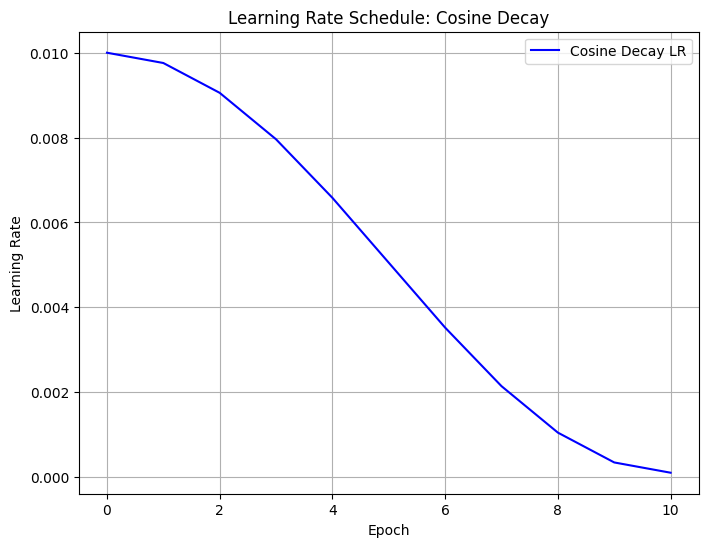

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Custom Learning Rate Parameters
lr0 = 0.01          # Initial learning rate
lrf = 0.01          # Final learning rate multiplier
epochs = 10         # Total number of epochs

# Cosine Learning Rate Decay
def cosine_lr(epoch, total_epochs, lr_start, lr_end):
    return lr_end + 0.5 * (lr_start - lr_end) * (1 + np.cos(np.pi * epoch / total_epochs))

# Compute Learning Rate Schedule
epoch_list = np.arange(0, epochs + 1)
learning_rates = [cosine_lr(e, epochs, lr0, lr0 * lrf) for e in epoch_list]

# Plot Learning Rate Schedule
plt.figure(figsize=(8, 6))
plt.plot(epoch_list, learning_rates, label='Cosine Decay LR', color='blue')
plt.title('Learning Rate Schedule: Cosine Decay')
plt.xlabel('Epoch')
plt.ylabel('Learning Rate')
plt.grid()
plt.legend()
plt.show()

In [20]:
import os
import pandas as pd

# Default directory where results are saved
results_dir = os.path.join("runs", "detect", "train")
print(f"Results are saved in: {results_dir}")

# Load results CSV
results_csv = os.path.join(results_dir, 'results.csv')

if os.path.exists(results_csv):
    # Read results
    results_df = pd.read_csv(results_csv)
    print("Available columns in results.csv:")
    print(results_df.columns)
else:
    print("Results CSV file not found. Training may not have completed.")

Results are saved in: runs/detect/train
Available columns in results.csv:
Index(['epoch', 'time', 'train/box_loss', 'train/cls_loss', 'train/dfl_loss',
       'metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)',
       'metrics/mAP50-95(B)', 'val/box_loss', 'val/cls_loss', 'val/dfl_loss',
       'lr/pg0', 'lr/pg1', 'lr/pg2'],
      dtype='object')


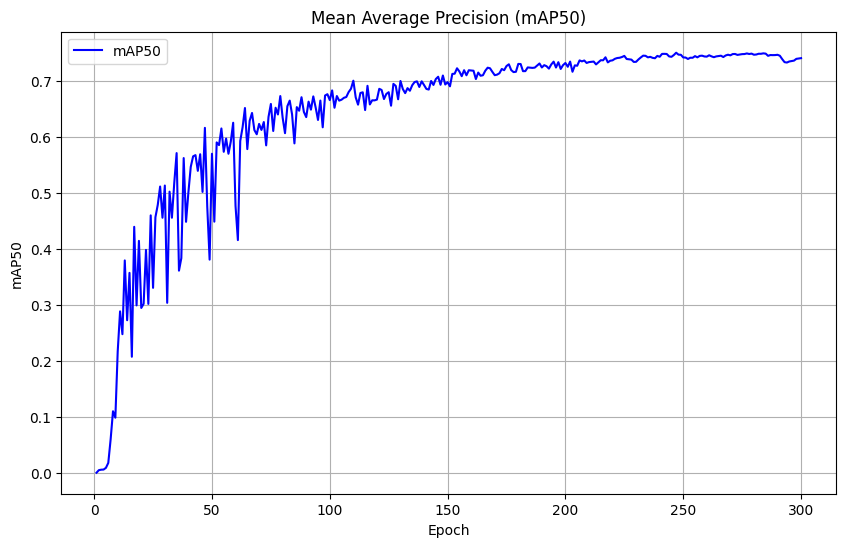

In [21]:
import matplotlib.pyplot as plt

# Plot mAP50 (Primary Metric)
if 'metrics/mAP50(B)' in results_df.columns:
    plt.figure(figsize=(10, 6))
    plt.plot(results_df['epoch'], results_df['metrics/mAP50(B)'], label='mAP50', color='blue')
    plt.title('Mean Average Precision (mAP50)')
    plt.xlabel('Epoch')
    plt.ylabel('mAP50')
    plt.legend()
    plt.grid()
    plt.show()
else:
    print("mAP50 column not found in results.csv.")

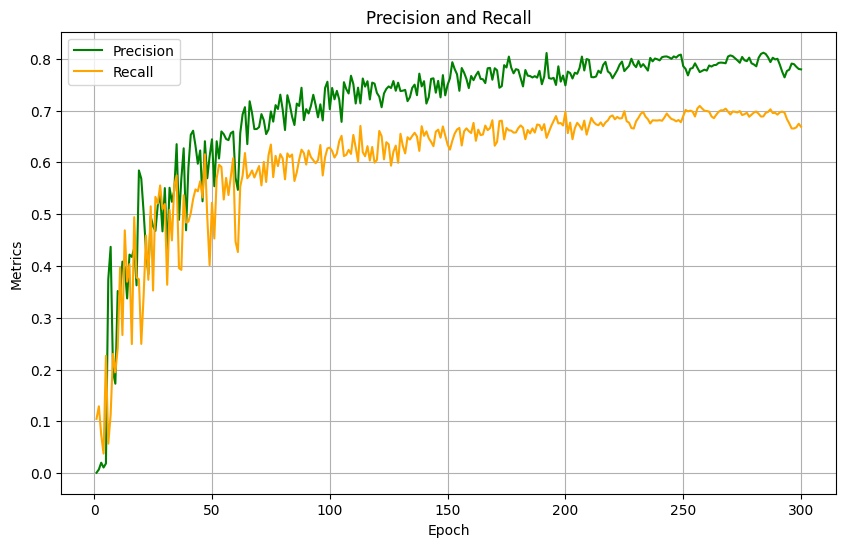

In [22]:
# Plot Precision and Recall
plt.figure(figsize=(10, 6))
if 'metrics/precision(B)' in results_df.columns:
    plt.plot(results_df['epoch'], results_df['metrics/precision(B)'], label='Precision', color='green')
if 'metrics/recall(B)' in results_df.columns:
    plt.plot(results_df['epoch'], results_df['metrics/recall(B)'], label='Recall', color='orange')

plt.title('Precision and Recall')
plt.xlabel('Epoch')
plt.ylabel('Metrics')
plt.legend()
plt.grid()
plt.show()

Available columns in results_df:
Index(['epoch', 'time', 'train/box_loss', 'train/cls_loss', 'train/dfl_loss',
       'metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)',
       'metrics/mAP50-95(B)', 'val/box_loss', 'val/cls_loss', 'val/dfl_loss',
       'lr/pg0', 'lr/pg1', 'lr/pg2'],
      dtype='object')


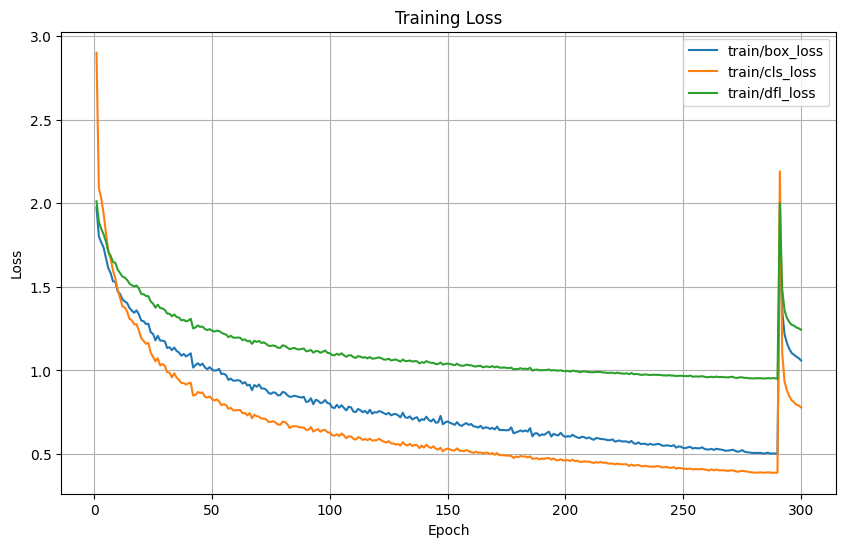

In [26]:
# Check available columns
print("Available columns in results_df:")
print(results_df.columns)

# Plot Loss Metrics
plt.figure(figsize=(10, 6))

# Replace loss column names based on actual results_df columns
for loss_col in ['train/box_loss', 'train/cls_loss', 'train/dfl_loss']:
    if loss_col in results_df.columns:
        plt.plot(results_df['epoch'], results_df[loss_col], label=loss_col)

plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

In [28]:
# Print available columns to debug
print("Available columns in results_df:")
print(results_df.columns)

# Analyze if the model is overfitting, underfitting, or balanced
if 'val/box_loss' in results_df.columns and 'train/box_loss' in results_df.columns:
    train_loss = results_df['train/box_loss'].iloc[-1]  # Last epoch training loss
    val_loss = results_df['val/box_loss'].iloc[-1]  # Last epoch validation loss

    print("\nTraining Quality Analysis:")
    if train_loss < val_loss * 0.7:
        print("The model is overfitting: Training loss is much lower than validation loss.")
    elif train_loss > val_loss * 1.3:
        print("The model is underfitting: Training loss is much higher than validation loss.")
    else:
        print("The model is balanced: Training and validation losses are close.")
else:
    print("Validation loss not available for analysis.")

Available columns in results_df:
Index(['epoch', 'time', 'train/box_loss', 'train/cls_loss', 'train/dfl_loss',
       'metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)',
       'metrics/mAP50-95(B)', 'val/box_loss', 'val/cls_loss', 'val/dfl_loss',
       'lr/pg0', 'lr/pg1', 'lr/pg2'],
      dtype='object')

Training Quality Analysis:
The model is overfitting: Training loss is much lower than validation loss.


In [25]:
# Print Final Metrics (mAP50, Precision, Recall)
final_epoch_metrics = results_df.iloc[-1]
print("\nFinal Metrics:")
if 'metrics/mAP50(B)' in final_epoch_metrics:
    print(f"mAP50: {final_epoch_metrics['metrics/mAP50(B)']:.3f}")
if 'metrics/precision(B)' in final_epoch_metrics:
    print(f"Precision: {final_epoch_metrics['metrics/precision(B)']:.3f}")
if 'metrics/recall(B)' in final_epoch_metrics:
    print(f"Recall: {final_epoch_metrics['metrics/recall(B)']:.3f}")


Final Metrics:
mAP50: 0.741
Precision: 0.779
Recall: 0.669


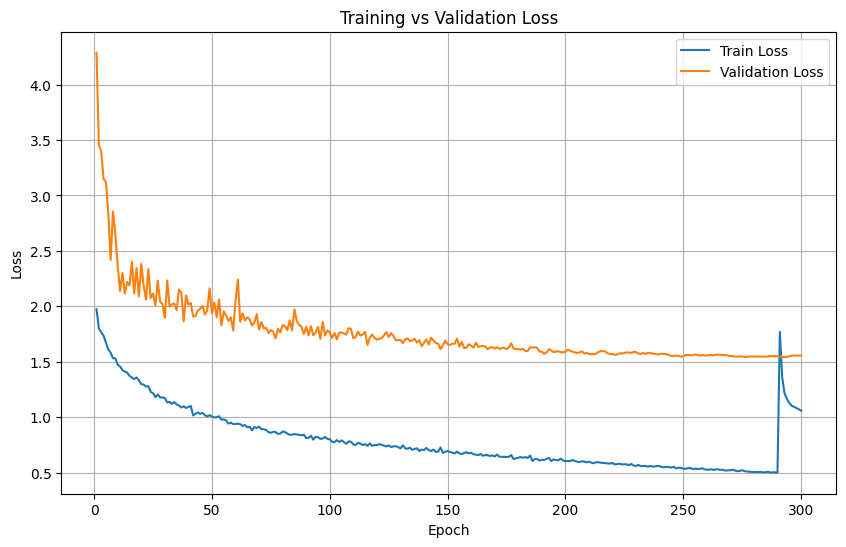

In [29]:
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(results_df['epoch'], results_df['train/box_loss'], label='Train Loss')
plt.plot(results_df['epoch'], results_df['val/box_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()